In [30]:
cg = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
mol = Table.read('../molclouds.txt',format='ascii')

### Select clouds from catalog based on distance

In [32]:
def cloudlim(n):
    q = np.where((cg['gl'] > mol['llower'][n]) & (cg['gl'] < mol['lupper'][n]) & (cg['gb'] > mol['blower'][n]) & (cg['gb'] > mol['bupper'][n]))# & (cg['dist'] > mol['dist'][n]-100) & (cg['dist'] < mol['dist'][n]+100))
    return q
c0 = cg[cloudlim(0)]
c1 = cg[cloudlim(1)]
c2 = cg[cloudlim(2)]
c3 = cg[cloudlim(3)]
c4 = cg[cloudlim(4)]
c5 = cg[cloudlim(5)]
c6 = cg[cloudlim(6)]
c7 = cg[cloudlim(7)]
c8 = cg[cloudlim(8)]
c9 = cg[cloudlim(9)]
c10 = cg[cloudlim(10)]
cs = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])

In [33]:
print(mol['name'][0]+' = '+str(len(c0)))
print(mol['name'][1]+' = '+str(len(c1)))
print(mol['name'][2]+' = '+str(len(c2)))
print(mol['name'][3]+' = '+str(len(c3)))
print(mol['name'][4]+' = '+str(len(c4)))
print(mol['name'][5]+' = '+str(len(c5)))
print(mol['name'][6]+' = '+str(len(c6)))
print(mol['name'][7]+' = '+str(len(c7)))
print(mol['name'][8]+' = '+str(len(c8)))
print(mol['name'][9]+' = '+str(len(c9)))
print(mol['name'][10]+' = '+str(len(c10)))

CMaOB1 = 36138
California = 39552
Crossbones = 25013
GemOB1 = 5552
Hercules = 264
Lacerta = 21916
Maddalena = 32341
MonOB1 = 22318
OrionLam = 32878
Rosette = 37923
SerpensAqR = 1759


In [34]:
areas = (mol['lupper']-mol['llower'])*(mol['bupper']-mol['blower'])

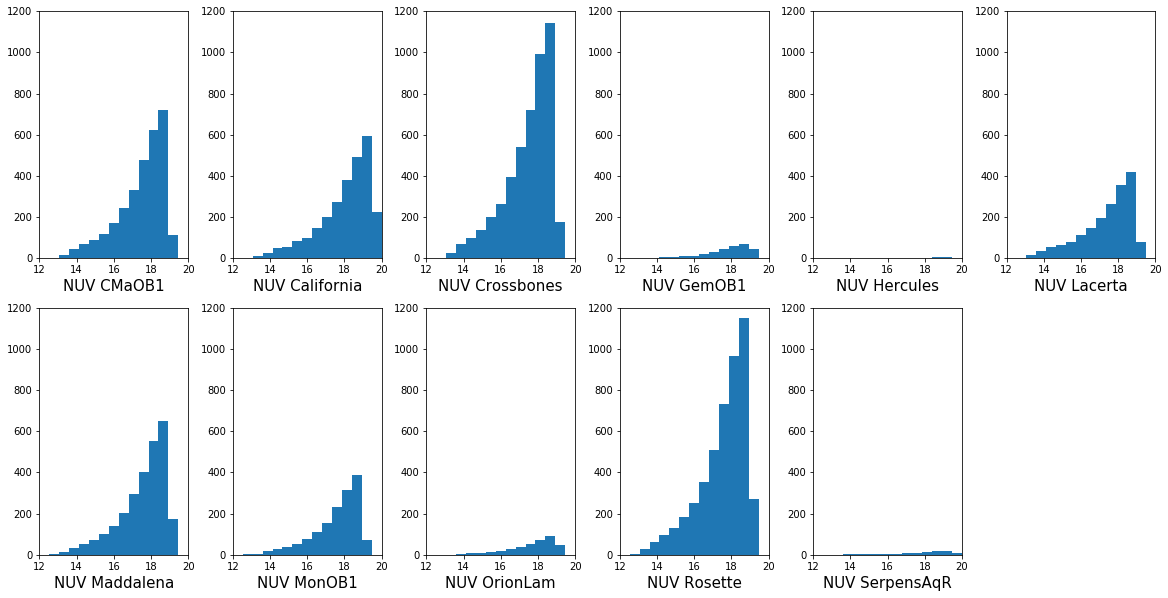

In [51]:
matplotlib.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(20, 10))
for i in range(1, 12):
    ax = fig.add_subplot(2, 6, i)
    cat = cs[i-1]
    x, bins, p = plt.hist(cat['nuv'], range=[12, 20], bins=15)
    for item in p:
        item.set_height(item.get_height()/areas[i-1])
    plt.xlim(12, 20)
    plt.ylim(0, 1200)
    plt.xlabel('NUV '+mol['name'][i-1], fontsize=15)
plt.subplots_adjust(wspace=0.3)
plt.show()

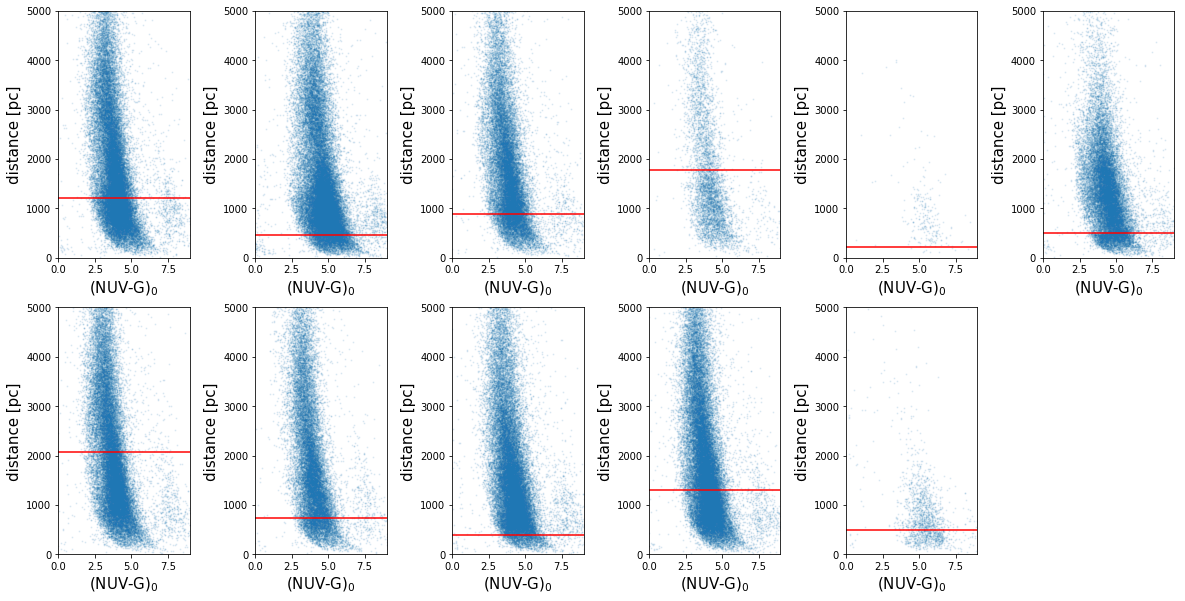

In [47]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 12):
    ax = fig.add_subplot(2, 6, i)
    cat = cs[i-1]
    #plt.scatter((cat['nuv']-cat['ebv']*7.24)-(cat['phot_g_mean_mag']-cat['ebv']*2.85), cat['dist'],c=cat['phot_g_mean_mag']-cat['distmod'], s=1, alpha=0.1)
    plt.scatter((cat['nuv'])-(cat['phot_g_mean_mag']), cat['dist'], s=1, alpha=0.1)

    plt.xlabel('(NUV-G)$_0$', fontsize=15)
    plt.ylabel('distance [pc]', fontsize=15)
    plt.xlim(0, 9)
    plt.ylim(0, 5000)
    plt.axhline(y=mol['dist'][i-1], c='red')
plt.subplots_adjust(wspace=0.5)
plt.show()

### Load in Gaia data for these regions

In [57]:
g0 = fits.open('../molclouds_gaia/cmaob1-result.fits')[1].data
g1 = fits.open('../molclouds_gaia/California-result.fits')[1].data
g2 = fits.open('../molclouds_gaia/Crossbones-result.fits')[1].data
g3 = fits.open('../molclouds_gaia/GemOB1-result.fits')[1].data
g4 = fits.open('../molclouds_gaia/hercules-result.fits')[1].data
g5 = fits.open('../molclouds_gaia/lacerta-result.fits')[1].data
g6 = fits.open('../molclouds_gaia/Maddalena-result.fits')[1].data
g7 = fits.open('../molclouds_gaia/MonOB1-result.fits')[1].data
g8 = fits.open('../molclouds_gaia/OrionLam-result.fits')[1].data
g9 = fits.open('../molclouds_gaia/Rosette-result.fits')[1].data
g10 = fits.open('../molclouds_gaia/serpens-result.fits')[1].data

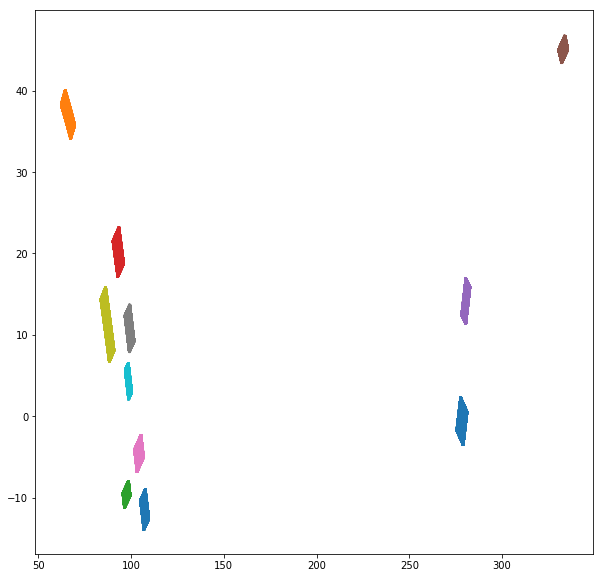

In [70]:
plt.scatter(g0['ra'], g0['dec'],s=1,alpha=0.1)
plt.scatter(g1['ra'], g1['dec'],s=1,alpha=0.1)
plt.scatter(g2['ra'], g2['dec'],s=1,alpha=0.1)
plt.scatter(g3['ra'], g3['dec'],s=1,alpha=0.1)
plt.scatter(g4['ra'], g4['dec'],s=1,alpha=0.1)
plt.scatter(g5['ra'], g5['dec'],s=1,alpha=0.1)
plt.scatter(g6['ra'], g6['dec'],s=1,alpha=0.1)
plt.scatter(g7['ra'], g7['dec'],s=1,alpha=0.1)
plt.scatter(g8['ra'], g8['dec'],s=1,alpha=0.1)
plt.scatter(g9['ra'], g9['dec'],s=1,alpha=0.1)
plt.scatter(g10['ra'], g10['dec'],s=1,alpha=0.1)
plt.show()